In [17]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.ensemble import RandomForestClassifier

# Data Preprocessing

In [16]:
df_train = pd.read_csv('/content/drive/MyDrive/Spring24/data_mining/train.csv')
df_test  = pd.read_csv('/content/drive/MyDrive/Spring24/data_mining/test.csv')

df_train.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True)

df_train['Age'].fillna(df_train['Age'].median(), inplace=True)

df_train['Embarked'].fillna(df_train['Embarked'].mode()[0], inplace=True)

df_train = pd.get_dummies(df_train, columns=['Sex', 'Embarked'])

X = df_train.drop('Survived', axis=1)
y = df_train['Survived']

# Learn and fine-tune a decision tree model

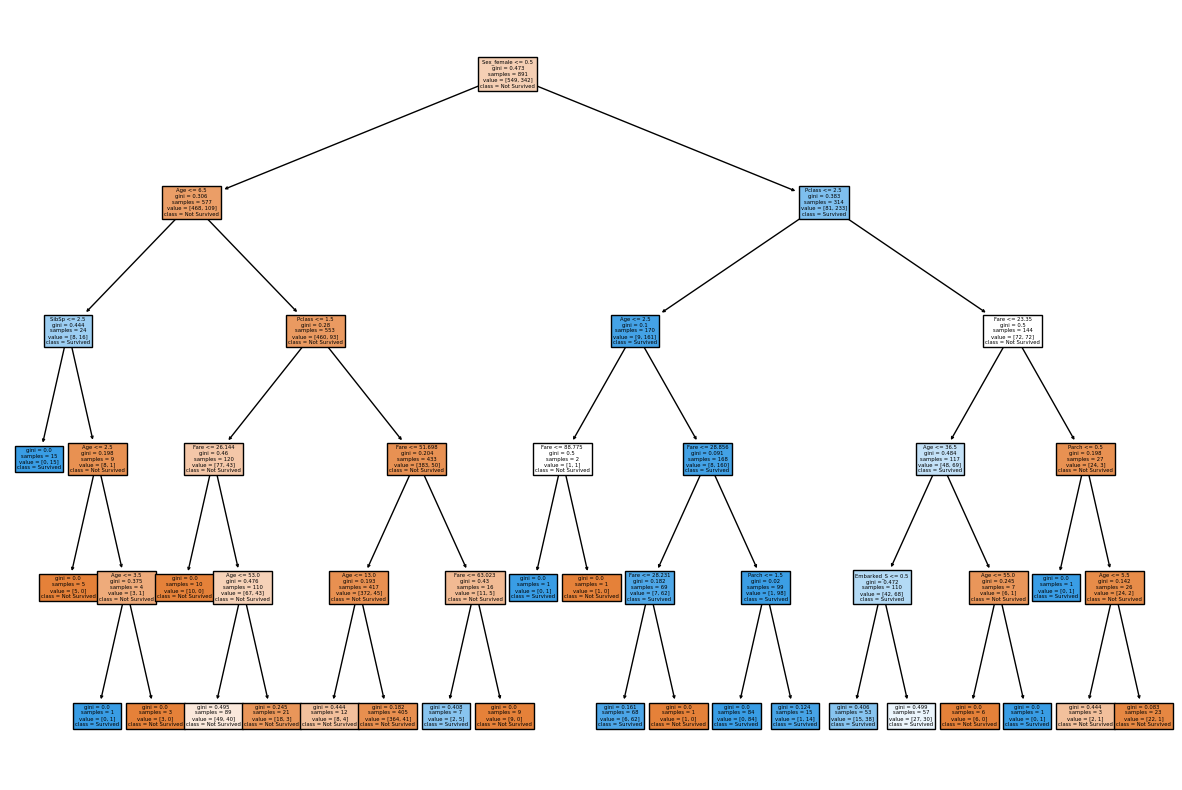

In [18]:
dt_classifier = DecisionTreeClassifier()

param_grid = {'max_depth': [3, 5, 7, 10]}

grid_search = GridSearchCV(dt_classifier, param_grid, cv=5)
grid_search.fit(X, y)

best_dt_model = grid_search.best_estimator_

plt.figure(figsize=(15, 10))
plot_tree(best_dt_model, feature_names=X.columns, class_names=['Not Survived', 'Survived'], filled=True)
plt.show()

# Apply 5-fold Cross-validation for Decision Tree Model

In [19]:
dt_scores = cross_val_score(best_dt_model, X, y, cv=5)

dt_avg_accuracy = dt_scores.mean()
print("Decision Tree Average Classification Accuracy:", dt_avg_accuracy)

Decision Tree Average Classification Accuracy: 0.8103320569957944


# Apply 5-fold Cross-validation for Random Forest Model

In [20]:
from sklearn.ensemble import RandomForestClassifier

# Create Random Forest classifier
rf_classifier = RandomForestClassifier()

# Perform grid search to find the best hyperparameters
grid_search_rf = GridSearchCV(rf_classifier, param_grid, cv=5)
grid_search_rf.fit(X, y)

# Get the best Random Forest model
best_rf_model = grid_search_rf.best_estimator_

# Perform 5-fold cross-validation
rf_scores = cross_val_score(best_rf_model, X, y, cv=5)

# Calculate average classification accuracy
rf_avg_accuracy = rf_scores.mean()
print("Random Forest Average Classification Accuracy:", rf_avg_accuracy)

Random Forest Average Classification Accuracy: 0.8237900947837551


# Algorithm Comparison

In [21]:
if dt_avg_accuracy > rf_avg_accuracy:
    print("Decision Tree performs better.")
elif rf_avg_accuracy > dt_avg_accuracy:
    print("Random Forest performs better.")
else:
    print("Both algorithms perform equally well.")

Random Forest performs better.


In [ ]:
"""
Observations and Conclusions:

1. Random Forests perform better due to the large number of features and data. However this case may not be evident of that as the number of features
in the dataset and the number of data points are both limited.
2. Random Forests help mitigate overfitting due to bagging while Decision Trees tend to overfit.

"""